In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date',parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [18]:
# Clean data
# by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
           (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

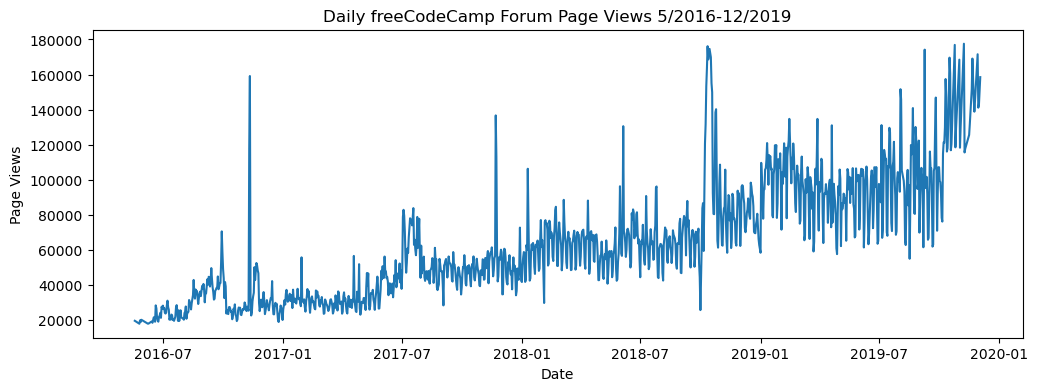

In [23]:
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.lineplot(data=df,x='date',y='value')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [44]:
#Create a draw_bar_plot function that draws a bar chart 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of Months. 
#On the chart, the label on the x axis should be Years 
#and the label on the y axis should be Average Page Views.

newdf = df.copy()
newdf['month'] = pd.DatetimeIndex(newdf.index).month
newdf['year'] = pd.DatetimeIndex(newdf.index).year

newdf = newdf.groupby(['year','month'])['value'].mean()

newdf = newdf.unstack()

newdf.columns = ['January','February','March','April','May','June'
                 ,'July','August','September','October','November','December']

newdf

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


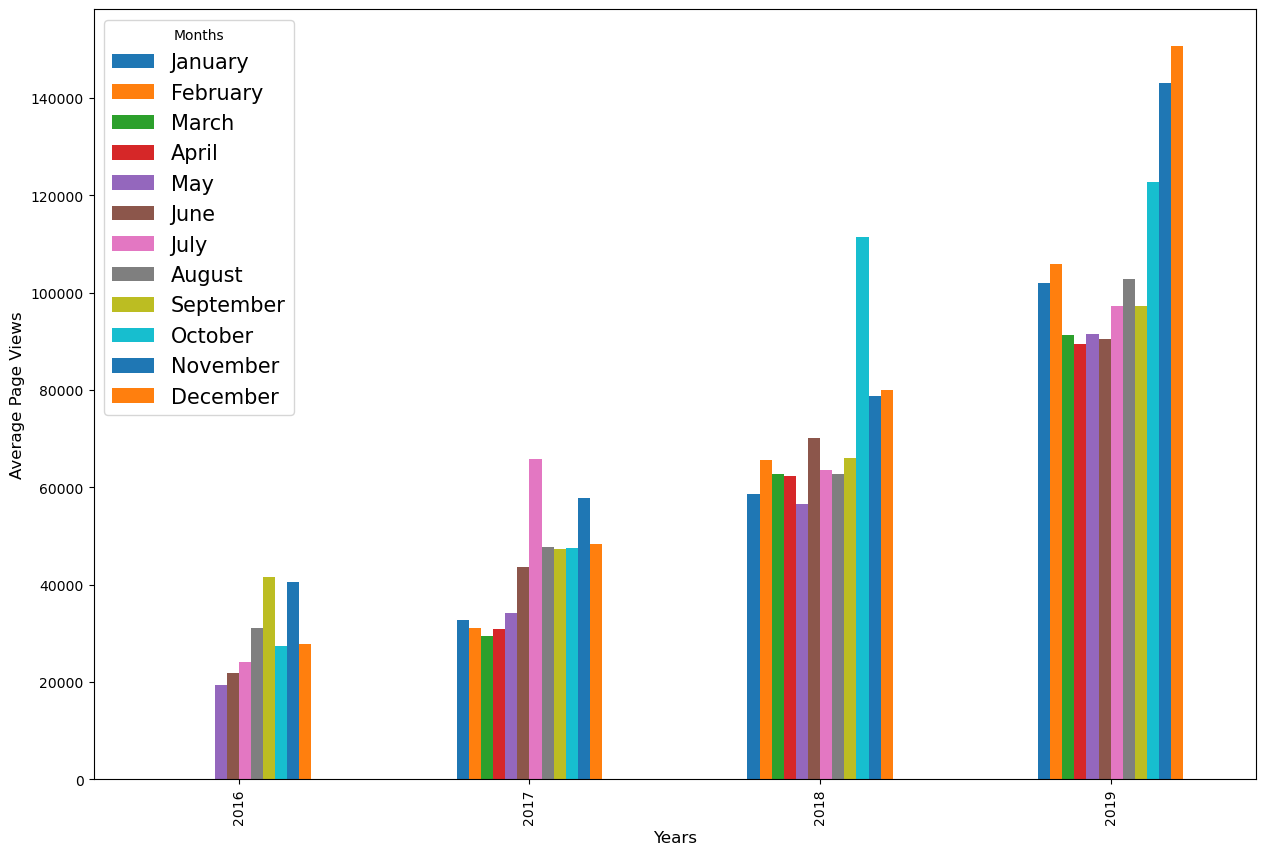

In [45]:
fig = newdf.plot(kind= 'bar', figsize = (15,10)).figure

plt.title('')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Average Page Views',fontsize=12)
plt.legend(title= 'Months', fontsize = 15,loc='upper left')

In [50]:
# Create a box plot
# prepare data for box plots (this part is done!)
df_box = df.copy().reset_index()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

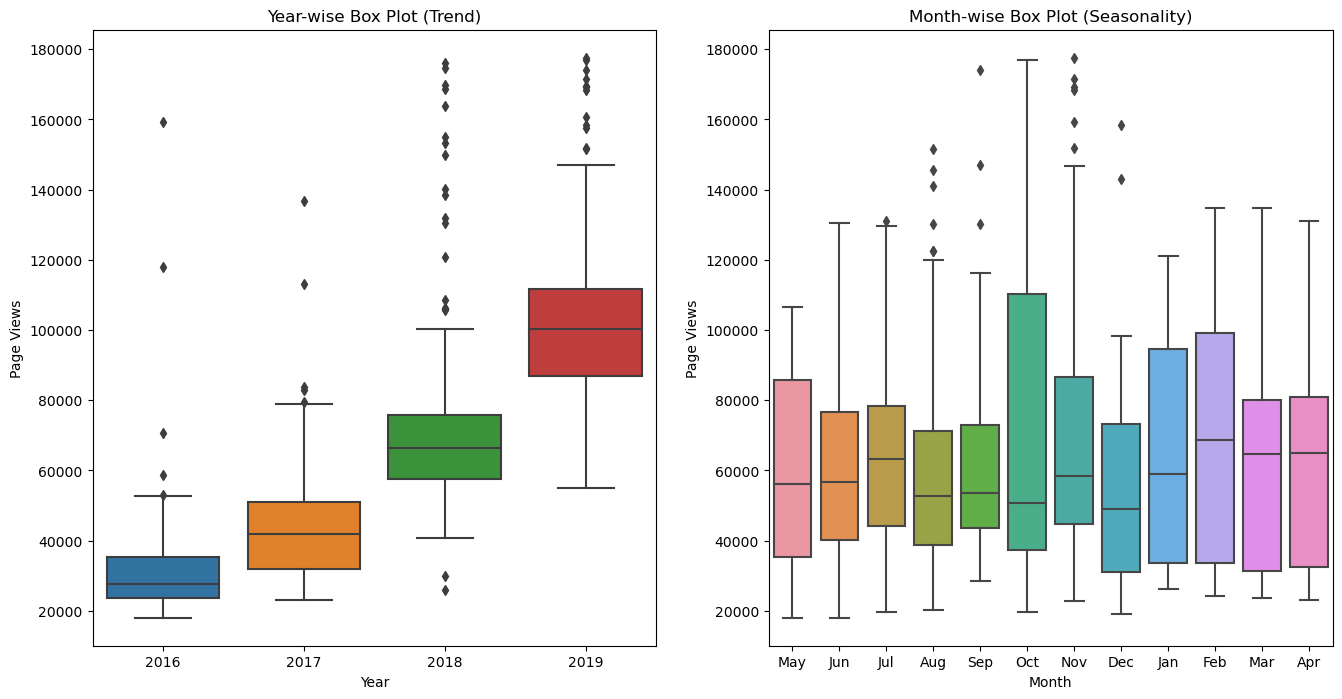

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(ax=ax1,x='year',y='value',data=df_box)
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")

sns.boxplot(ax=ax2,x='month',y='value',data=df_box)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")